<a href="https://colab.research.google.com/github/siddharthanand25/siddharthanand25.github.io/blob/master/Covid19Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  #for data analysis
import matplotlib.pyplot as plt   #visualisatin library
import seaborn as sns   #advanced plotting library linked with matplotlib
import numpy as np      #numerical python
import datetime as dt    #dataset should be understood as a model  , understanding time format
from datetime import timedelta     #timedelta is time duration
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR             #support vector regressor (takes the concept of vectors)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
print("size/shape of the data set\n",covid.shape)   # rows and coulmns
print("checking for null values: \n ",covid.isnull().sum())  #number of null values present
print("Checking data types : ",covid.dtypes)

size/shape of the data set
 (13209, 8)
checking for null values: 
  SNo                   0
ObservationDate       0
Province/State     6382
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking data types :  SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#data preprocessing- cleaning the process
#dropping the coulmn
covid.drop(["SNo"],1,inplace=True)   # applied on the dataset
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [ ]:
#grouping diff types of cases as per date
datewise= covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
print("Basic information")
print("Total numver of confirmed cases : ", datewise["Confirmed"].iloc[-1])
print("Total numver of Recovered cases : ", datewise["Recovered"].iloc[-1])
print("Total numver of Deaths cases : ", datewise["Deaths"].iloc[-1])
print("Total numver of active cases : ", datewise["Confirmed"].iloc[-1]- datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total numver of closed cases : ", datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic information
Total numver of confirmed cases :  1511104.0
Total numver of Recovered cases :  328661.0
Total numver of Deaths cases :  88338.0
Total numver of active cases :  1094105.0
Total numver of closed cases :  416999.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

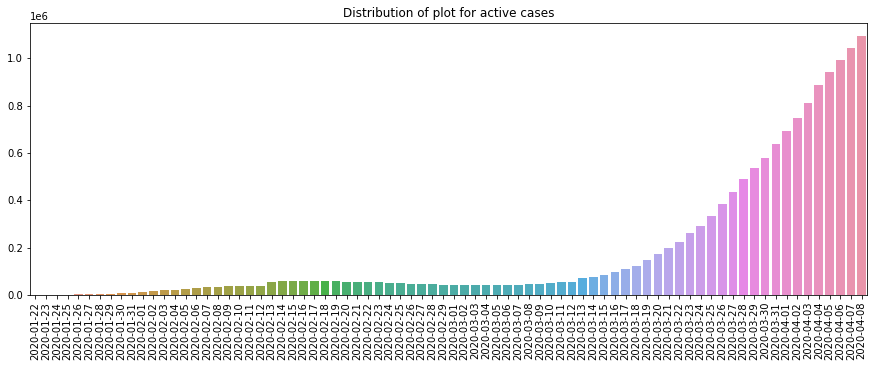

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y= datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution of plot for active cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

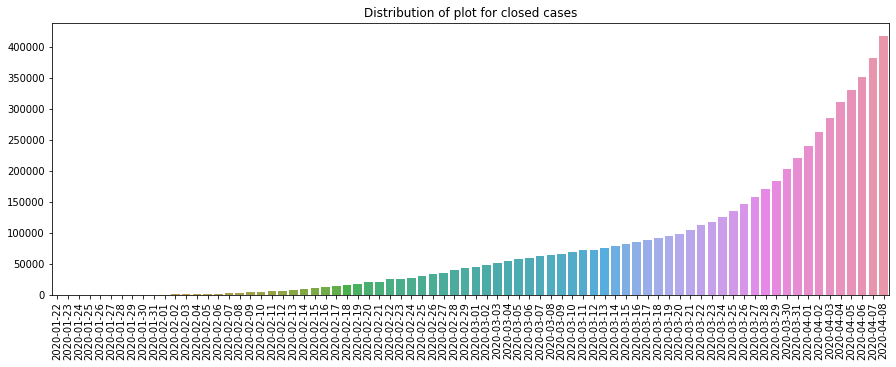

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y= datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution of plot for closed cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

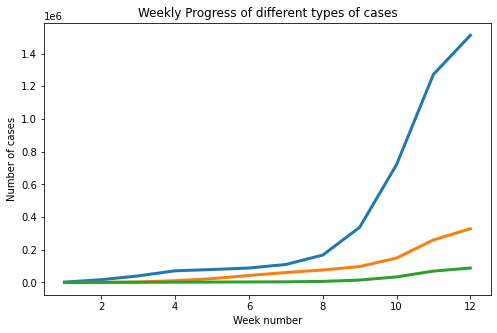

In [ ]:
datewise["WeekOfYear"]=datewise.index.weekofyear
week_num = []
weekwise_confirmed =[]
weekwise_recovered =[]
weekwise_death =[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_death.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize = (8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth = 3)
plt.plot(week_num,weekwise_death,linewidth = 3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")




Average increase in number of confirmed cases everyday  19366.0
Average increase in number of Recovered cases everyday  4213.0
Average increase in number of Deaths cases everyday  1132.0


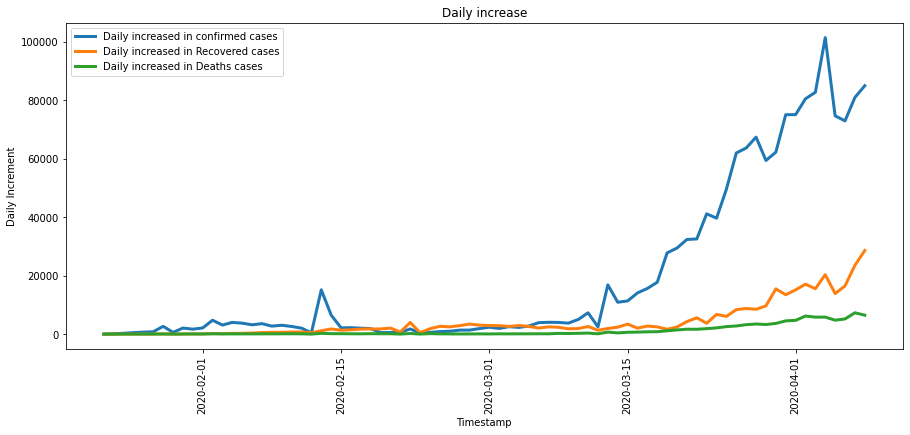

In [ ]:
plt.figure(figsize=(15,6))  #legend=used to display your scale
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increased in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increased in Recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increased in Deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase")
plt.xticks(rotation=90)
plt.legend()

print("Average increase in number of confirmed cases everyday ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday ",np.round(datewise["Deaths"].diff().fillna(0).mean()))



In [ ]:
#Calculating the country wise mortality rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending =False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


Text(0.5, 1.0, 'Top15 countries as per number of death cases')

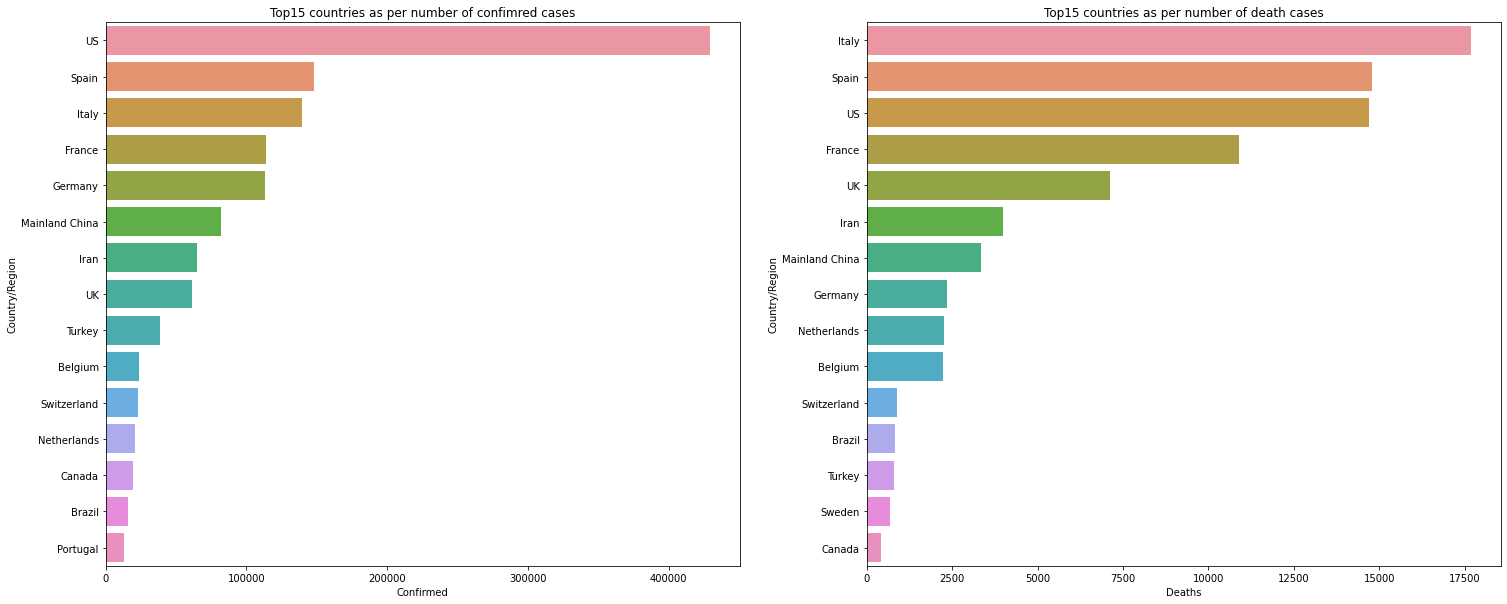

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top15 countries as per number of confimred cases")
sns.barplot(x = top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top15 countries as per number of death cases")


In [ ]:
#Data Analysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Actvie Cases:",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])


Confirmed    5916.0
Recovered     506.0
Deaths        178.0
Name: 2020-04-08 00:00:00, dtype: float64
Total Actvie Cases: 5232.0
Total Closed cases 684.0


Text(0.5, 1.0, 'Week of casely Progress of different typess')

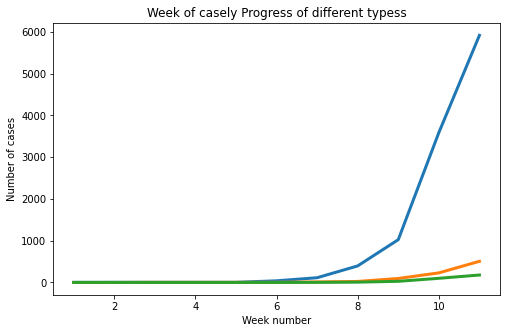

In [ ]:
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed =[]
india_weekwise_recovered =[]
india_weekwise_death =[]
w=1
for i in list(datewise_india["WeekOfYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekOfYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_death.append(datewise_india[datewise_india["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize = (8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth = 3)
plt.plot(week_num_india,india_weekwise_death,linewidth = 3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Week of casely Progress of different typess")




In [ ]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed cases to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed cases to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed cases to India")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed cases to India")



It took 70 days in India to reach 5916.0 Confirmed Cases
It took 37 days in Italy to reach number of Confirmed cases to India
It took 55 days in US to reach number of Confirmed cases to India
It took 42 days in Spain to reach number of Confirmed cases to India
It took 7 days in China to reach number of Confirmed cases to India


In [ ]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores = []
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree = 6,kernel= 'poly',epsilon=0.01)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f' %x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LINEAR REGRSN","SVM PREDICTION"])
model_predictions.head(10)


,Dates,LINEAR REGRSN,SVM PREDICTION
0,2020-04-09,481900,1651382
1,2020-04-10,489496,1779618
2,2020-04-11,497091,1916232
3,2020-04-12,504686,2061657
4,2020-04-13,512282,2216342
5,2020-04-14,519877,2380751
6,2020-04-15,527472,2555369
7,2020-04-16,535068,2740696
8,2020-04-17,542663,2937251
9,2020-04-18,550258,3145571
